<a href="https://colab.research.google.com/github/NesaraRahal/Farm-Animal-Filtering-System/blob/main/project/ATR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opencv-python

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [36]:
#Reminder you change the image to balck sheep
image_path = "/content/White_sheep_-_Avebury,_Wiltshire,_England_-_DSC00332.jpg"
sheep = cv2.imread(image_path)

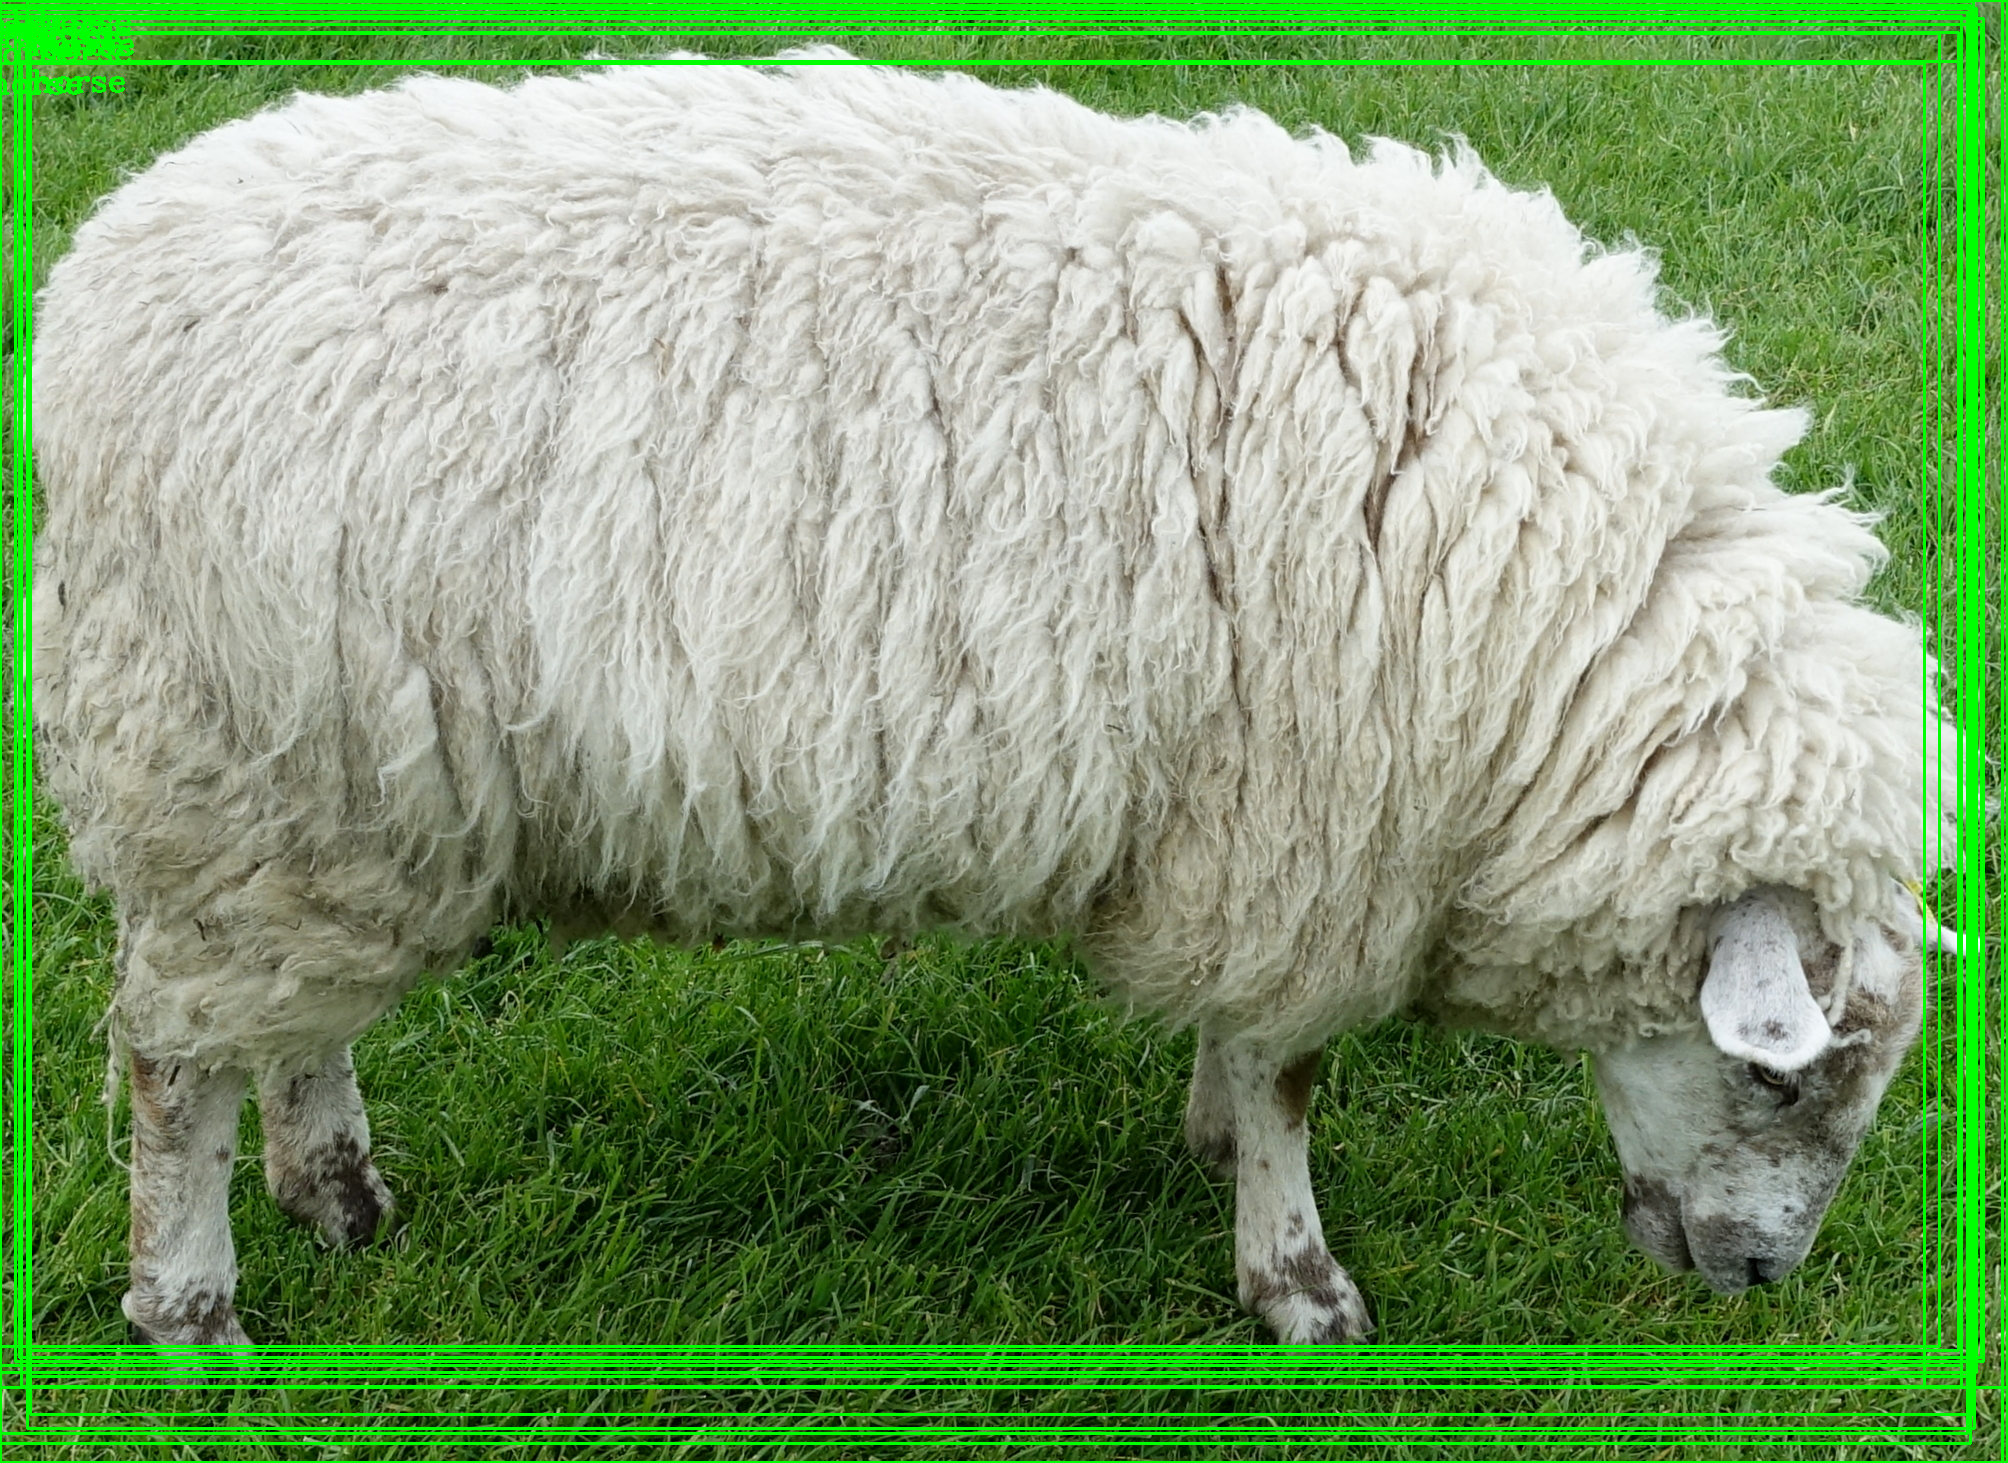

In [37]:
class_names = []
class_file = '/content/yolov3_classes.txt'
with open(class_file, 'rt') as f:
    class_names = f.read().rstrip('\n').split('\n')

# Load the configuration and weights files
config_path = '/content/yolov4.cfg'
weights_path = '/content/yolov4.weights'


# Set up the neural network
net = cv2.dnn_DetectionModel(weights_path, config_path)
net.setInputSize(320, 320)
net.setInputScale(1.0 / 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

# Perform the detection
class_ids, confs, bbox = net.detect(sheep, confThreshold=0.5)

# Create a mask for segmentation
mask = np.zeros(sheep.shape[:2], dtype=np.uint8)

    # Draw bounding boxes and create the mask
for class_id, confidence, box in zip(class_ids.flatten(), confs.flatten(), bbox):
   x, y, w, h = box
   sheep_cropped = sheep[y:y+h, x:x+w]
   cv2.rectangle(sheep, box, color=(0, 255, 0), thickness=2)
   cv2.putText(sheep, class_names[class_id - 1], (box[0] + 10, box[1] + 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
  # Update mask to include the sheep's bounding box area
   mask[box[1]:box[1]+box[3], box[0]:box[0]+box[2]] = 255

    # Segment the sheep from the original image using the mask
#sheep_segmented = cv2.bitwise_and(sheep, sheep, mask=mask)

cv2_imshow(sheep_cropped)

In [38]:
#Gray scale conversion
def grayConversion():
  gray_sheep = cv2.cvtColor(sheep_cropped, cv2.COLOR_BGR2GRAY)
  return gray_sheep

In [10]:
#Gray scale conversion
def grayConversionCounter(countersheep):
  gray_sheep = cv2.cvtColor(countersheep, cv2.COLOR_BGR2GRAY)
  return gray_sheep

In [11]:
#Function for displaying histogram
def displayHistogram(gray_sheep):
    # Calculate the histogram
    histogram = cv2.calcHist([gray_sheep], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.plot(histogram)
    plt.title('Histogram of Grayscale Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [12]:
#Negative transformation will use for brown and black sheeps
def negativeTransformation(gray_sheep):
  gray_sheep = 255 - gray_sheep
  cv2_imshow(gray_sheep)
  return gray_sheep

In [13]:
#Contrast Stretching for  brown or black sheep
def contrastStretching(gray_sheep):
  min_val, max_val = np.min(gray_sheep), np.max(gray_sheep)
  gray_sheep = 255.0 * (gray_sheep - min_val) / (max_val - min_val)
  cv2_imshow(gray_sheep.astype(np.uint8))

In [14]:
#Application of mean and median filtering to remove noise
def removeNoise(gray_sheep):
    gray_sheep = cv2.blur(gray_sheep, (3, 3))
    gray_sheep = cv2.medianBlur(gray_sheep, 3)
    plt.imshow(gray_sheep, cmap='gray')
    plt.title('Grayscale Image after Noise Removal')
    plt.show()
    return gray_sheep

In [15]:
#Equalizing the image and displaying equalized image
def equalizedGreyImage(gray_sheep):

    # Equalize the histogram of the grayscale image
    equalized_gray_sheep = cv2.equalizeHist(gray_sheep)

    # Display the equalized grayscale image
    plt.imshow(equalized_gray_sheep, cmap='gray')
    plt.title('Equalized Grayscale Image')
    plt.show()

    return  equalized_gray_sheep

In [16]:
def equalizedHistogram(equalized_gray_sheep):
    # Calculate the histogram of the equalized image
    histogram = cv2.calcHist([equalized_gray_sheep], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.plot(histogram)
    plt.title('Histogram of Equalized Grayscale Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [17]:
def grayToColor(gray_sheep):
    # Stack the grayscale image into 3 channels
    color_sheep = cv2.cvtColor(gray_sheep, cv2.COLOR_GRAY2BGR)
    return color_sheep

In [18]:
def displayColorImage(color_sheep):
    plt.imshow(cv2.cvtColor(color_sheep, cv2.COLOR_BGR2RGB))
    plt.title('Color Image After Conversion')
    plt.show()

In [19]:
#Threshold the image to create a binary mask
def thresholdMask(equalized_gray_sheep):
    # Threshold the image to create a binary mask
    th, thimg = cv2.threshold(equalized_gray_sheep, 215, 255, cv2.THRESH_BINARY)
    plt.imshow(thimg, cmap='gray')
    plt.title('Thresholded Image')
    plt.show()
    return thimg

#Threshold the image to create a binary mask
def thresholdMaskInverse(equalized_gray_sheep):
    # Threshold the image to create a binary mask
    th, thimg = cv2.threshold(equalized_gray_sheep, 50, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(thimg, cmap='gray')
    plt.title('Thresholded Image')
    plt.show()
    return thimg

In [22]:
 # Perform morphological operations on the thresholded image
def morphologicalOperation(thimg):
    kernel = np.ones((5, 5), np.uint8)
    thimg = cv2.morphologyEx(thimg, cv2.MORPH_CLOSE, kernel)
    plt.imshow(thimg, cmap='gray')
    plt.title('Morphologically Processed Thresholded Image')
    plt.show()
    return thimg

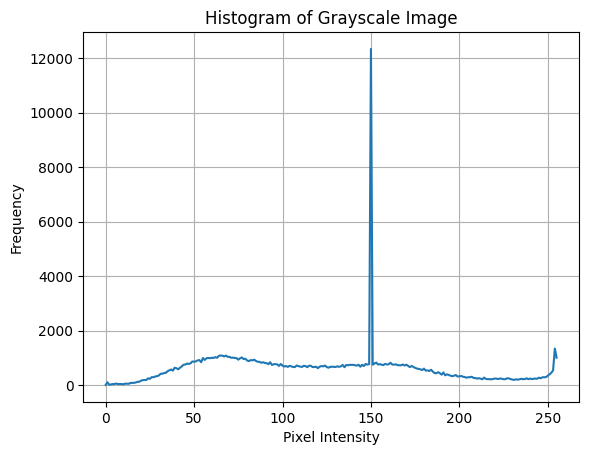

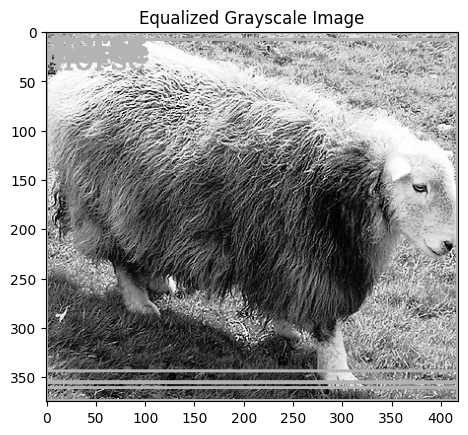

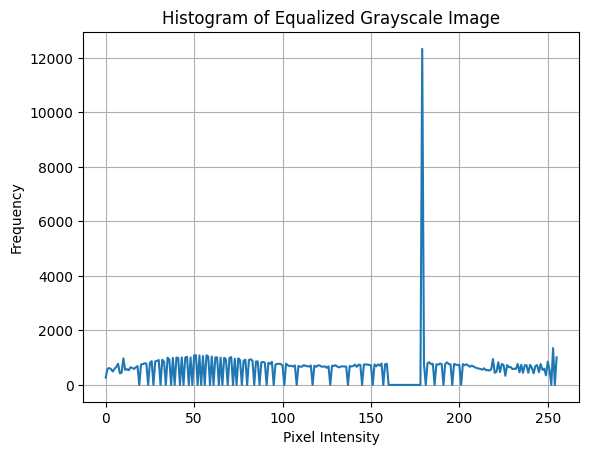

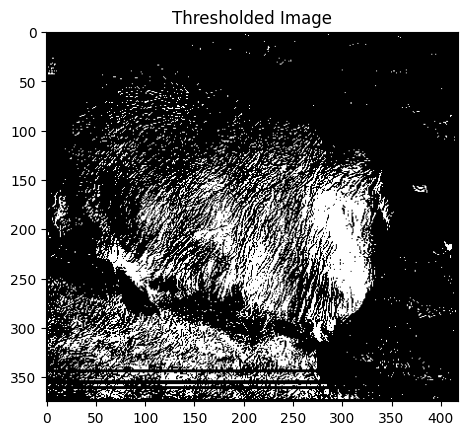

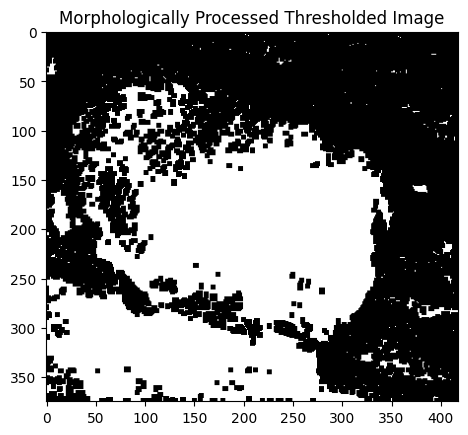

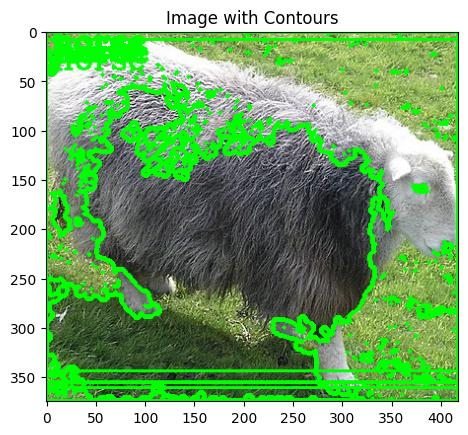

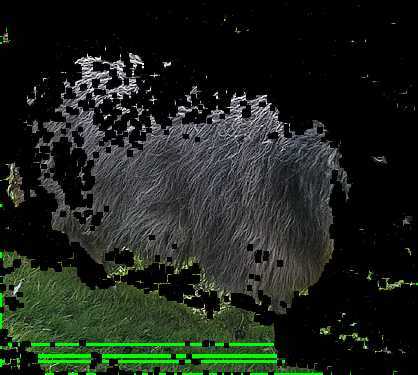

Gray Wool Sheep: Natural color products and specialty markets


In [23]:
hsv_image_unknown = cv2.cvtColor(sheep_cropped, cv2.COLOR_BGR2HSV)

# Define the HSV range for black, brown, and white colors
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])
lower_brown = np.array([10, 100, 20], dtype=np.uint8)
upper_brown = np.array([20, 255, 200], dtype=np.uint8)
lower_white = np.array([0, 0, 200], dtype=np.uint8)
upper_white = np.array([180, 20, 255], dtype=np.uint8)
lower_gray = np.array([0, 0, 50], dtype=np.uint8)
upper_gray = np.array([180, 50, 200], dtype=np.uint8)

# Create masks for black, brown, and white colors
black_mask = cv2.inRange(hsv_image_unknown, lower_black, upper_black)
brown_mask = cv2.inRange(hsv_image_unknown, lower_brown, upper_brown)
white_mask = cv2.inRange(hsv_image_unknown, lower_white, upper_white)

# Combine the masks for black and brown colors
combined_mask = cv2.bitwise_or(black_mask, brown_mask)

# Perform morphological operations to remove small noise
kernel = np.ones((5, 5), np.uint8)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)
combined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_OPEN, kernel)

# Check if any black or brown regions are detected
black_or_brown_detected = np.any(combined_mask)

#Will use threshold to get more accurate image wiht or without brwon and black pixels
min_pixel_count = 500000
black_brown_count = cv2.countNonZero(combined_mask)

gray_sheep = grayConversion()

#Display histogram - unequalized image
displayHistogram(gray_sheep)

# Perform specific operations if black or brown sheep are detected
"""if black_or_brown_detected and black_brown_count > min_pixel_count:
    gray_sheep = negativeTransformation(gray_sheep)
    gray_sheep = contrastStretching(gray_sheep)"""

# Equalize the histogram of the grayscale image
equalized_gray_sheep = equalizedGreyImage(gray_sheep);
equalizedHistogram(equalized_gray_sheep)

# Threshold the image to create a binary mask
if black_or_brown_detected and black_brown_count > min_pixel_count:
    thimg = thresholdMaskInverse(equalized_gray_sheep)
else:
    thimg = thresholdMask(equalized_gray_sheep)

# Perform morphological operations on the thresholded image
thimg = morphologicalOperation(thimg)

# Ensure the mask is a single channel binary mask
if thimg.ndim == 3:
   thimg = thimg[:, :, 0]

# Ensure the mask is of type CV_8U
if thimg.dtype != np.uint8:
   thimg = thimg.astype(np.uint8)

# Create a mask for extracting the segmented color part
color_mask = cv2.bitwise_and(sheep_cropped, sheep_cropped, mask=thimg)

# Convert the mask to BGRA (optional, for visualization)
segmented_color_part = cv2.cvtColor(color_mask, cv2.COLOR_BGR2BGRA)

# Find contours
contours, _ = cv2.findContours(thimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy the original image to draw contours on
highlighted_image = sheep_cropped.copy()

# Draw the contours on the image
cv2.drawContours(highlighted_image, contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.show()

# Convert the image to HSV
hsv_image = cv2.cvtColor(segmented_color_part, cv2.COLOR_BGR2HSV)
cv2_imshow(segmented_color_part)

# Create masks
white_mask = cv2.inRange(hsv_image, lower_white, upper_white)
black_mask = cv2.inRange(hsv_image, lower_black, upper_black)
brown_mask = cv2.inRange(hsv_image, lower_brown, upper_brown)
gray_mask = cv2.inRange(hsv_image, lower_gray, upper_gray)

# Combine masks for mixed color detection
mixed_mask = white_mask | black_mask | brown_mask

# Count the number of pixels in each mask, but only within the segmented region
white_count = cv2.countNonZero(cv2.bitwise_and(white_mask, white_mask, mask=thimg))
black_count = cv2.countNonZero(cv2.bitwise_and(black_mask, black_mask, mask=thimg))
brown_count = cv2.countNonZero(cv2.bitwise_and(brown_mask, brown_mask, mask=thimg))
gray_count = cv2.countNonZero(cv2.bitwise_and(gray_mask, gray_mask, mask=thimg))
mixed_count = cv2.countNonZero(cv2.bitwise_and(mixed_mask, mixed_mask, mask=thimg))

# Classify based on the dominant color
"""if (black_count > 0 and brown_count > 0) or (black_count > 0 and white_count > 0) or (black_count > 0 and gray_count > 0) or (brown_count > 0 and white_count > 0) or (brown_count > 0 and gray_count > 0) or (white_count > 0 and gray_count > 0):
  classification = 'Mixed Color Sheep'"""
if black_count > white_count and black_count > brown_count and black_count > gray_count:
  classification = 'Black Wool Sheep: Specialty products'
elif brown_count > white_count and brown_count > black_count and brown_count > gray_count:
  classification = 'Brown Wool Sheep: Natural or blended use'
elif gray_count > white_count and gray_count > black_count and gray_count>brown_count:
  classification = 'Gray Wool Sheep: Natural color products and specialty markets'
elif white_count > black_count and white_count > brown_count and white_count > gray_count:
  classification = 'White Wool Sheep: Commercial wool production'
else:
  classification = 'No sheep detected'

print(classification)

In [21]:
pip install numpy

In [24]:
pip install matplotlib

In [25]:
pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 76.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046366 sha256=1276d3afd4a687e1dfccb8a7bd28b930d775ffb9190fb5ba4c8f4255978f4e39
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12066 sha256=64ab2458ed565bb0cf6f9d93c470a7a58be0e5b1a0b27a108552046151c8a352
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [26]:
pip install numpy matplotlib cvlib opencv-python opencv-python-headless

In [27]:
from cvlib.object_detection import draw_bbox

In [28]:
from numpy.lib.polynomial import poly

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv

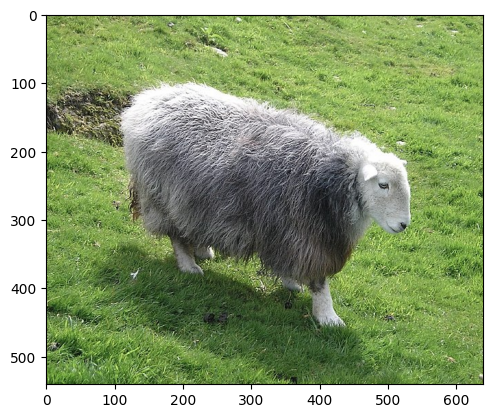

In [30]:
# Download yolov4.weights
weights_path = '/content/yolov4.weights'

# Load the image
image_pathCounter = '/content/flock-of-sheep-in-green-pasture-lamb-group-photo.jpeg'
sheepCounter = cv2.imread(image_path)
sheepCounter = cv2.cvtColor(sheepCounter, cv2.COLOR_BGR2RGB)
plt.imshow(sheepCounter)

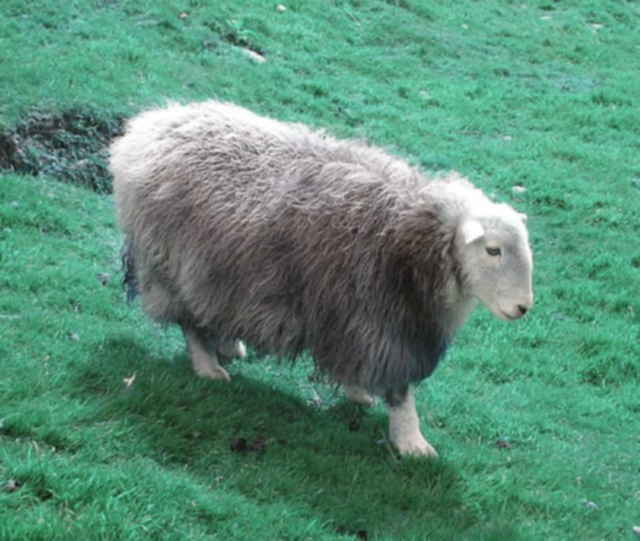

In [31]:
sheepCounter = cv2.GaussianBlur(sheepCounter, (5, 5), 0)
cv2_imshow(sheepCounter)

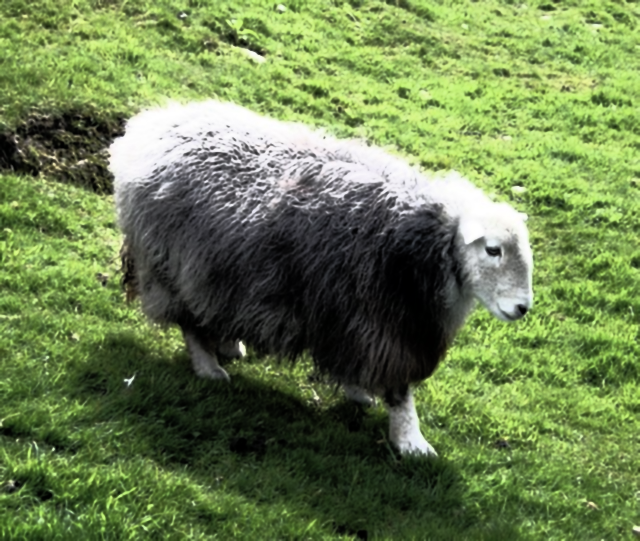

In [32]:
# Convert to HSV color space
hsv_counter = cv2.cvtColor(sheepCounter, cv2.COLOR_BGR2HSV)

# Split into channels
h, s, v = cv2.split(hsv_counter)

# Apply histogram equalization to the V channel
equalized_v = cv2.equalizeHist(v)

# Merge channels
equalized_hsv = cv2.merge([h, s, equalized_v])

# Convert back to BGR color space
equalized_counter = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2BGR)

equalized_counter = cv2.cvtColor(equalized_counter, cv2.COLOR_BGR2RGB)
cv2_imshow(equalized_counter)


In [ ]:
cfg_path = '/content/yolov4.cfg'

weights_path = '/content/yolov4.cfg'

classes_path = '/content/yolov3_classes.txt'


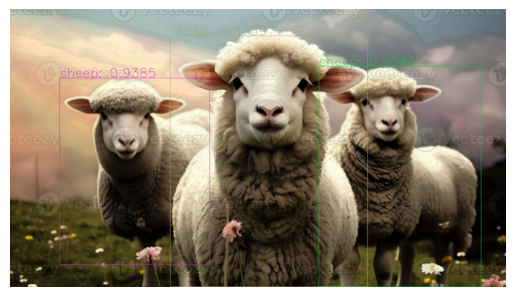

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the class labels
with open(classes_path, 'r') as f:
    class_names = f.read().strip().split('\n')

# Ensure "Sheep" is in class names
if "sheep" not in class_names:
    print("Warning: 'sheep' not found in class labels.")
else:
    sheep_class_id = class_names.index("sheep")

# Load the YOLO model
net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Load the image
#image_path = '/content/flock-of-sheep-in-green-pasture-lamb-group-photo.jpeg'
#sheep = cv2.imread(image_path)
(H, W) = equalized_counter.shape[:2]

# Create a blob from the image
blob = cv2.dnn.blobFromImage(equalized_counter, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Perform the forward pass
layer_outputs = net.forward(output_layers)

# Initialize lists for detection details
boxes = []
confidences = []
class_ids = []

# Loop over each output layer
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maxima suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw bounding boxes and count sheep
sheep_count = 0
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in np.random.uniform(0, 255, size=(3,))]
        cv2.rectangle(equalized_counter, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(class_names[class_ids[i]], confidences[i])
        cv2.putText(equalized_counter, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 3, color, 2)
        if class_ids[i] == sheep_class_id:
            sheep_count += 1

# Convert the image back to RGB for displaying
sheep = cv2.cvtColor(equalized_counter, cv2.COLOR_BGR2RGB)

# Display the output
plt.imshow(sheep)
plt.axis('off')
plt.show()

In [ ]:
print(f"Number of sheep detected: {sheep_count}")

Number of sheep detected: 3
